# Generative Adversarial Networks in Slanted Land

In this notebook, we build a very simple pair of GANs.
- The dataset is a dataset of 2x2 black and white images, where the images we want to generate (the faces) are backwards diagonals (\\)
- The neural networks only have one layer.

Below is the YouTube video corresponding to this notebook.

In [1]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/watch?v=8L11aMN5KY8" frameborder="0" allowfullscreen></iframe>')

/home/mxochicale/anaconda3/envs/simpleVE/lib/python3.10/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


### Imports

In [2]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

%matplotlib inline

### Plotting function

In [3]:
def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  
    return fig, axes

# Examples of faces

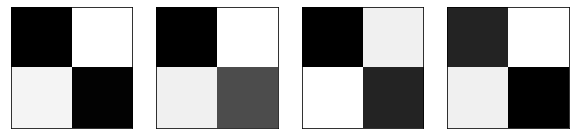

In [4]:
faces = [np.array([0.99,0.01,0.1,0.98]),
         np.array([0.95,0.1,0.2,0.75]),
         np.array([0.9,0.2,0.1,0.8]),
         np.array([0.8,0.1,0.2,0.9])
        ]
    
_ = view_samples(faces, 1, 4)

# Examples of noise
The following are randomly generated images, which don't correspond to faces.

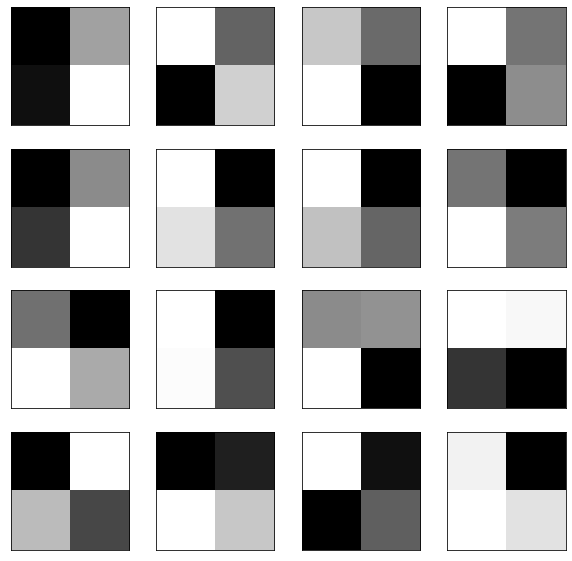

In [5]:
noise = [np.random.randn(2,2) for i in range(20)]
#def generate_random_image():
#    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,4)

# Building the neural networks

In [6]:
# The sigmoid activation function
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

## The Discriminator

<img src="discriminator_math.png" />

In [7]:
class Discriminator():
    def __init__(self):
        #self.weights = np.array([0.0 for i in range(4)])
        #self.bias = 0.0
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        # We want the prediction to be 1, so the error is -log(prediction)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= LEARNING_RATE * ders[0]
        self.bias -= LEARNING_RATE * ders[1]

    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1-prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= LEARNING_RATE * ders[0]
        self.bias -= LEARNING_RATE * ders[1]

## The Generator
<img src="generator_math.png" />

In [8]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= LEARNING_RATE * ders[0]
        self.biases -= LEARNING_RATE * ders[1]
        error_after = self.error(z, discriminator)

# Training

In [9]:
# Set random seed
np.random.seed(42)

# Hyperparameters
LEARNING_RATE = 0.1
EPOCHS = 5000

# The GAN
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

for epoch in tqdm(range(0,EPOCHS)):
    
    for face in faces:
        #print(f' face: {face}')
        
        # Update the discriminator weights from the real face
        D.update_from_image(face)
    
        # Pick a random number to generate a fake face
        z = random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        
        # Calculate the generator error
        errors_generator.append(G.error(z, D))

            
        # Build a fake face
        noise = G.forward(z)
        
        # Update the discriminator weights from the fake face
        D.update_from_noise(noise)
    
        # Update the generator weights from the fake face
        G.update(z, D)
        

  0%|          | 0/5000 [00:00<?, ?it/s]

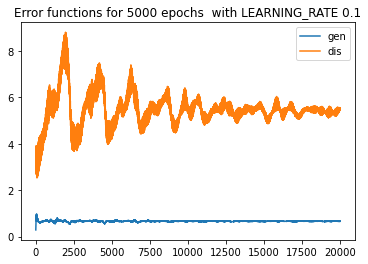

In [10]:
plt.plot(errors_generator)
plt.plot(errors_discriminator)
plt.title(f'Error functions for {EPOCHS} epochs  with LEARNING_RATE {LEARNING_RATE}')
plt.legend(["gen", "dis"])
plt.show()

# Generating images

generated_image_i: [0.92557854 0.08481639 0.11365647 0.84179626]
generated_image_i: [0.91098132 0.07562668 0.1209027  0.83091984]
generated_image_i: [0.91471169 0.07774951 0.11912447 0.83358874]
generated_image_i: [0.91437824 0.07755414 0.11928532 0.83334732]
generated_image_i: [0.91466226 0.07772048 0.11914834 0.83355292]
generated_image_i: [0.92830874 0.08683894 0.11220618 0.84397303]
generated_image_i: [0.92297169 0.08298599 0.11501077 0.83976346]
generated_image_i: [0.91713898 0.07920699 0.11794191 0.83536374]
generated_image_i: [0.90679662 0.07339848 0.12284479 0.82800535]
generated_image_i: [0.90077463 0.07044266 0.12555014 0.82394629]


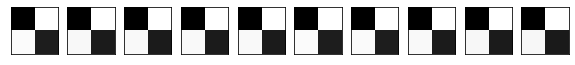

In [11]:
generated_images = []
number_of_images = 10
for i in range(number_of_images):
    z = random.random()
    generated_image = G.forward(z)
    generated_images.append(generated_image)

_ = view_samples(generated_images, 1, number_of_images)

for generated_image_i in generated_images:
    print(f'generated_image_i: {generated_image_i}')

# Studying the weights and biases of the Generator and Discriminator

In [12]:
print(f'==============================================================')
print("Generator weights", G.weights)
print("Generator biases", G.biases)

print(f'==============================================================')
print("Discriminator weights", D.weights)
print("Discriminator bias", D.bias)

Generator weights [ 0.54566776  0.34886865 -0.1959232   0.22244915]
Generator biases [ 2.19378071 -2.58763317 -1.93655216  1.53839139]
Discriminator weights [ 0.03623644 -0.20880701  0.17168305 -0.10745313]
Discriminator bias -0.011607042523622414


# Few Results with different epoch and learning rate values

```
# epochs 

#0050000 in ~25s with LR=0.1
#0050000 in ~26s with LR=0.01
#0050000 in ~22s with LR=0.001


#0100000 in ~60s with LR=0.1     
#0100000 in ~30s with LR=0.01     
#0100000 in ~58.3s with LR=0.001     


#1000000 in ~7m 37s with LR=0.1     
#1000000 in ~6m 46s with LR=0.01     
#1000000 in ~6m 38s with LR=0.001   

```

<img src="few_results.png" />



